In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('NCDB_1999_to_2014.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,2,5,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Hypothesis

In [ ]:
# There is a correlation between the age of a driver and car accidents

### Dataset

In [ ]:
# https://www.kaggle.com/datasets/tbsteal/canadian-car-accidents-19942014

### Explanation of the data

In [42]:
df.head(5)

# The data I am mostly making use of in this analysis is P_AGE, P_PSN
# P_AGE: the age of the person found in the accident
# P_USER: (assumption) this indicates the type of person involved in the accident (I am after the drivers)

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1999,1,1,20,2,02,34,UU,1,5,...,01,06,1990,01,M,41,11,1,UU,1
1,1999,1,1,20,2,02,34,UU,1,5,...,02,01,1987,01,M,19,11,1,UU,1
2,1999,1,1,20,2,02,34,UU,1,5,...,02,01,1987,02,F,20,13,2,02,2
3,1999,1,1,08,2,01,01,UU,5,3,...,01,01,1986,01,M,46,11,1,UU,1
4,1999,1,1,08,2,01,01,UU,5,3,...,99,NN,NNNN,01,M,05,99,2,UU,3


Text(0.5, 1.0, 'Relationship Between Age and Number of Accidents')

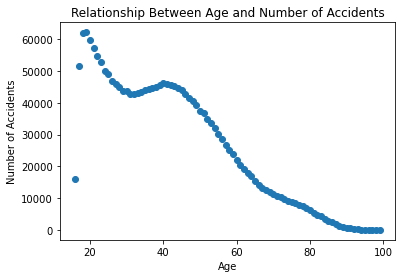

In [8]:
list_of_ages = df['P_AGE'].unique()
x = sorted(list_of_ages)

# remove people of ages less than 15 (since they are not drivers yet)
for i in range(15):
    x.remove(i+1)

y = []
# Getting the accident count for valid ages
for age in x:
    y.append(len(df[(df['P_AGE'] == age) & (df['P_USER'] == 1)]))

x = [int(x) for x in x]
plt.scatter(x,y)
plt.xlabel('Age')
plt.ylabel('Number of Accidents')
plt.title('Relationship Between Age and Number of Accidents')

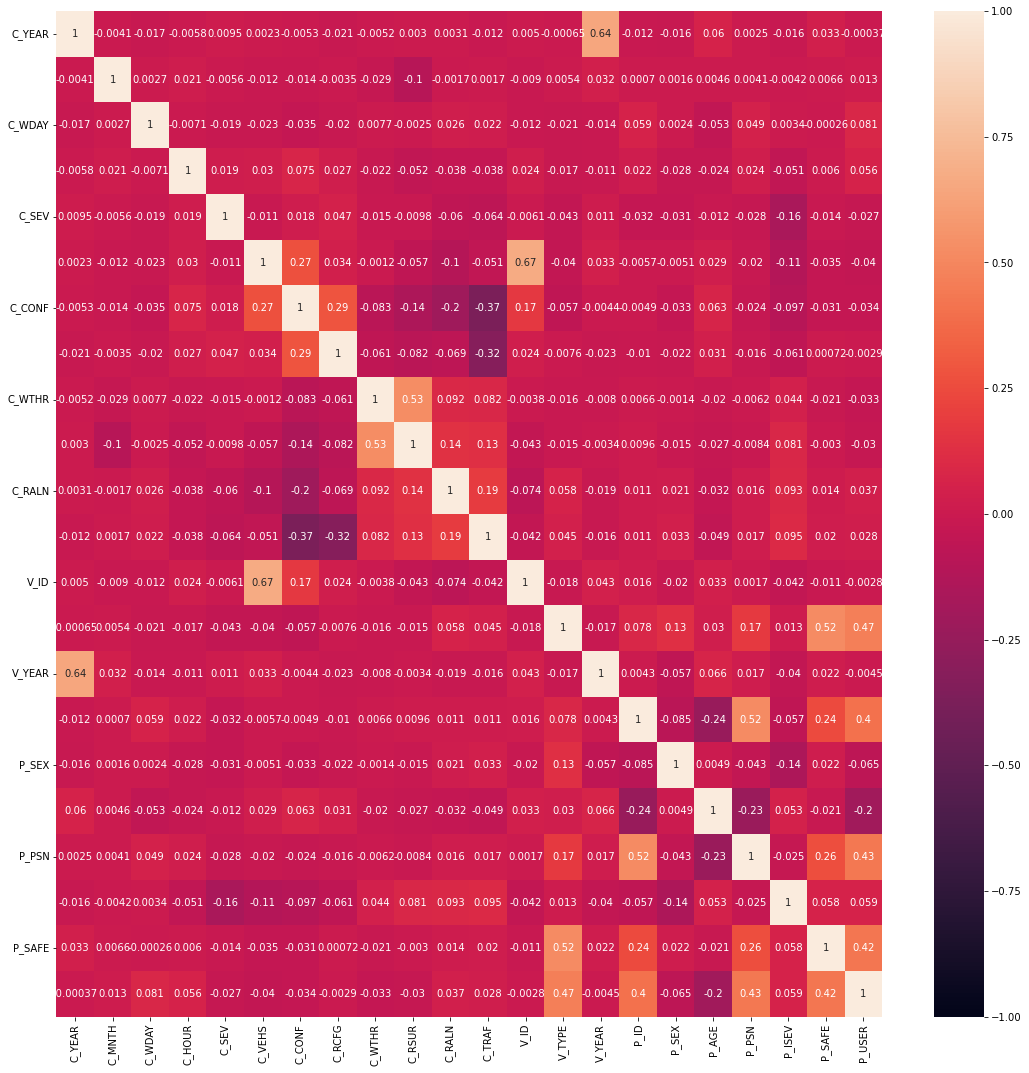

In [2]:
# give the reader an idea of the data and the relationships between the vars
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# ----------------------------------------------- DATA CLEANSING -------------------------------------------------------

# changing male and female to 1 and 0 respectively
df.loc[df['P_SEX'] == 'M', 'P_SEX'] = 1
df.loc[df['P_SEX'] == 'F', 'P_SEX'] = 0

# removing rows that have unknown information (heatmap only wants numerical values)
df = df.drop(df[(df['C_MNTH'] == 'UU') | (df['C_MNTH'] == 'XX')].index)
df = df.drop(df[(df['C_WDAY'] == 'U') | (df['C_WDAY'] == 'X')].index)
df = df.drop(df[(df['C_HOUR'] == 'UU') | (df['C_HOUR'] == 'XX')].index)
df = df.drop(df[(df['C_SEV'] == 'U') | (df['C_SEV'] == 'X')].index)
df = df.drop(df[(df['C_VEHS'] == 'UU') | (df['C_VEHS'] == 'XX')].index)
df = df.drop(df[(df['C_CONF'] == 'QQ') | (df['C_CONF'] == 'UU') | (df['C_CONF'] == 'XX')].index)
df = df.drop(df[(df['C_RCFG'] == 'QQ') | (df['C_RCFG'] == 'UU') | (df['C_RCFG'] == 'XX')].index)
df = df.drop(df[(df['C_WTHR'] == 'Q') | (df['C_WTHR'] == 'U') | (df['C_WTHR'] == 'X')].index)
df = df.drop(df[(df['C_RSUR'] == 'Q') | (df['C_RSUR'] == 'U') | (df['C_RSUR'] == 'X')].index)
df = df.drop(df[(df['C_RALN'] == 'Q') | (df['C_RALN'] == 'U') | (df['C_RALN'] == 'X')].index)
df = df.drop(df[(df['C_TRAF'] == 'QQ') | (df['C_TRAF'] == 'UU') | (df['C_TRAF'] == 'XX')].index)
df = df.drop(df[(df['V_ID'] == 'UU')].index)
df = df.drop(df[(df['V_TYPE'] == 'NN') | (df['V_TYPE'] == 'QQ') | (df['V_TYPE'] == 'UU') | (df['V_TYPE'] == 'XX')].index)
df = df.drop(df[(df['V_YEAR'] == 'NNNN') | (df['V_YEAR'] == 'UUUU') | (df['V_YEAR'] == 'XXXX')].index)
df = df.drop(df[(df['P_ID'] == 'NN') | (df['P_ID'] == 'UU')].index)
df = df.drop(df[(df['P_SEX'] == 'N') | (df['P_SEX'] == 'U') | (df['P_SEX'] == 'X')].index)
df = df.drop(df[(df['P_AGE'] == 'NN') | (df['P_AGE'] == 'UU') | (df['P_AGE'] == 'XX')].index)
df = df.drop(df[(df['P_PSN'] == 'NN') | (df['P_PSN'] == 'UU') | (df['P_PSN'] == 'XX') | (df['P_PSN'] == 'QQ')].index)
df = df.drop(df[(df['P_ISEV'] == 'N') | (df['P_ISEV'] == 'U') | (df['P_ISEV'] == 'X')].index)
df = df.drop(df[(df['P_SAFE'] == 'NN') | (df['P_SAFE'] == 'QQ') | (df['P_SAFE'] == 'UU') | (df['P_SAFE'] == 'XX') | (df['P_PSN'] == 'QQ')].index)
df = df.drop(df[(df['P_USER'] == 'U')].index)

# changing all values to type int
for col in df.columns:
    df = df.astype({col: int})

# ----------------------------------------------------------------------------------------------------------------------
    
# heatmap to show correlation between variables
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
fig = plt.gcf()
fig.set_size_inches(18.5, 18.5)

### Descriptive analytics

#### New DataFrame & Correlation Heatmap

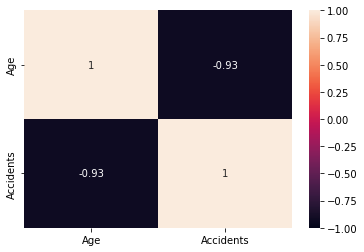

In [100]:
# Creation of DataFrame for data pertaining to age and number of accidents
main_df = pd.DataFrame()

s1 = pd.Series([int(i) for i in x])
s2 = pd.Series([int(j) for j in y])

main_df['Age'] = s1
main_df['Accidents'] = s2

main_df

heatmap = sns.heatmap(main_df.corr(), vmin=-1, vmax=1, annot=True)

#### Basic Statistics

In [9]:
print('The following data is for the entire dataset (from 1999-2014):')
print()

max_accidents = max(y)
max_accidents_age = x[y.index(max_accidents)]
print('Max # of accidents:', max_accidents, '\tAge:', max_accidents_age)

min_accidents = min(y)
min_accidents_age = x[y.index(min_accidents)]
print('Min # of accidents:', min_accidents, '\t\tAge:', min_accidents_age)

median = y[len(y)//2]
median_age = x[len(x)//2]
print("Median is:", median, '\t\tAge:', median_age)

avg_num_of_accidents = sum(y)/len(y)
print('Average # of accidents per age group:', avg_num_of_accidents)

The following data is for the entire dataset (from 1999-2014):

Max # of accidents: 62173 	Age: 19
Min # of accidents: 12 		Age: 97
Median is: 25222 		Age: 58
Average # of accidents per age group: 25843.333333333332


#### Visualization of Accidents per Age for each Year

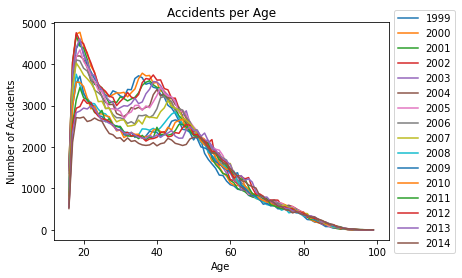

In [3]:
# Data per year
from matplotlib.pyplot import figure
years = df['C_YEAR'].unique()
list_of_ages = df['P_AGE'].unique()
x = sorted(list_of_ages)

# remove people of ages less than 15 (since they are not drivers yet)
for i in range(15):
    x.remove(i+1)

i = 0
# Getting the accident count for valid ages
for year in years:
    i += 1
    y = []
    for age in x:
        y.append(len(df[(df['P_AGE'] == age) & (df['P_USER'] == 1) & (df['C_YEAR'] == year)]))

    x = [int(x) for x in x]
    plt.plot(x,y, label=int(year))
    plt.xlabel('Age')
    plt.ylabel('Number of Accidents')
    plt.title('Accidents per Age')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Predictive analytics

In [ ]:
# In the predictive model the RESPONSE VARIABLE will be the NUMBER OF ACCIDENTS from an age group
# the PREDICTOR VARIABLE will be the AGE

# Since we want to see if there is a correlation between an age group and the number of accidents they get in
# it is only natural that these are the predictor and response variables.

### Predictive Model

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

# Split the data into training and testing data for the predictive model
(X_train, X_test, Y_train, Y_test) = train_test_split(main_df['Age'], main_df['Accidents'])

X_train = X_train.values.reshape(-1,1)
Y_train = Y_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
Y_test = Y_test.values.reshape(-1,1)

# train the model with the training data
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

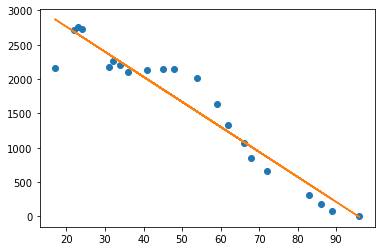

In [99]:
# Visualize LinearRegression model
y_pred = model.predict(X_test)
plt.plot(X_test,Y_test, 'o')
plt.plot(X_test, y_pred)
plt.show()

### Hypothesis Test

In [44]:
# Hypothesis test of Linear Correlation Coefficient (using the P-Value method)

# -----------------------------------------------------------------------------------------------------------------
# | Note: I know that this data isn't necessarily linear, but for the purpose of the project and to demonstrate a |
# |      process for something like this I chose to show it anyways                                               |
# -----------------------------------------------------------------------------------------------------------------

# -----------------------------------------------------------------------------------------------------------------
# Assumptions for Testing the significance of the Linear Correlation Coefficient
# 1. Data is quantitative and obtained from a simple random sample
#    Yes, somewhat
#
# 2. The scatter plot show that the data is approximately linearly related.
#    Yes, somewhat linearly related.
#
# 3. There are no outliers in the data
#    No, there are none
#
# 4. The variables x and y must come from normally distributed populations 
#    Somewhat

In [85]:
from scipy import stats

alpha = 0.05

# r is the correlation coefficient

r, pvalue = stats.pearsonr(main_df['Age'], main_df['Accidents'])

print('Null Hypothesis: no correlation between age and vehicle accidents')
print('Alternative Hypothesis: there is some correlation between age and vehicle accidents')
print()
print("alpha = 0.05")
print()
print("r =", r)
print("P-value =", pvalue)

if pvalue < alpha:
    print("\nSince P-value < 0.05 (alpha), we reject the Null Hypothesis and accept the Alternative Hypothesis.")
    print('Therefore, this hypothesis test indicates that there is a significant correlation between age and vehicle accidents')
else:
    print("\nSince P-value >= (alpha), we accept the Null Hypothesis.")


Null Hypothesis: no correlation between age and vehicle accidents
Alternative Hypothesis: there is some correlation between age and vehicle accidents

alpha = 0.05

r = -0.9478798236954868
P-value = 1.720532805227414e-42

Since P-value < 0.05 (alpha), we reject the Null Hypothesis and accept the Alternative Hypothesis.
Therefore, this hypothesis test indicates that there is a significant correlation between age and vehicle accidents
